In [17]:
# 모듈 불러오기
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#스케일 변환 
from sklearn.preprocessing import StandardScaler

#주성분 분석
from sklearn.decomposition import PCA

#회귀분석 
import statsmodels.api as sm

# 그래프 표시
%matplotlib inline

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [2]:
df_raw=pd.read_csv("./직무능력평가.csv")
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [3]:
##데이터 분리 
df_raw_y=df_raw['EVAL']
df_raw_x=df_raw.drop("EVAL",axis=1)


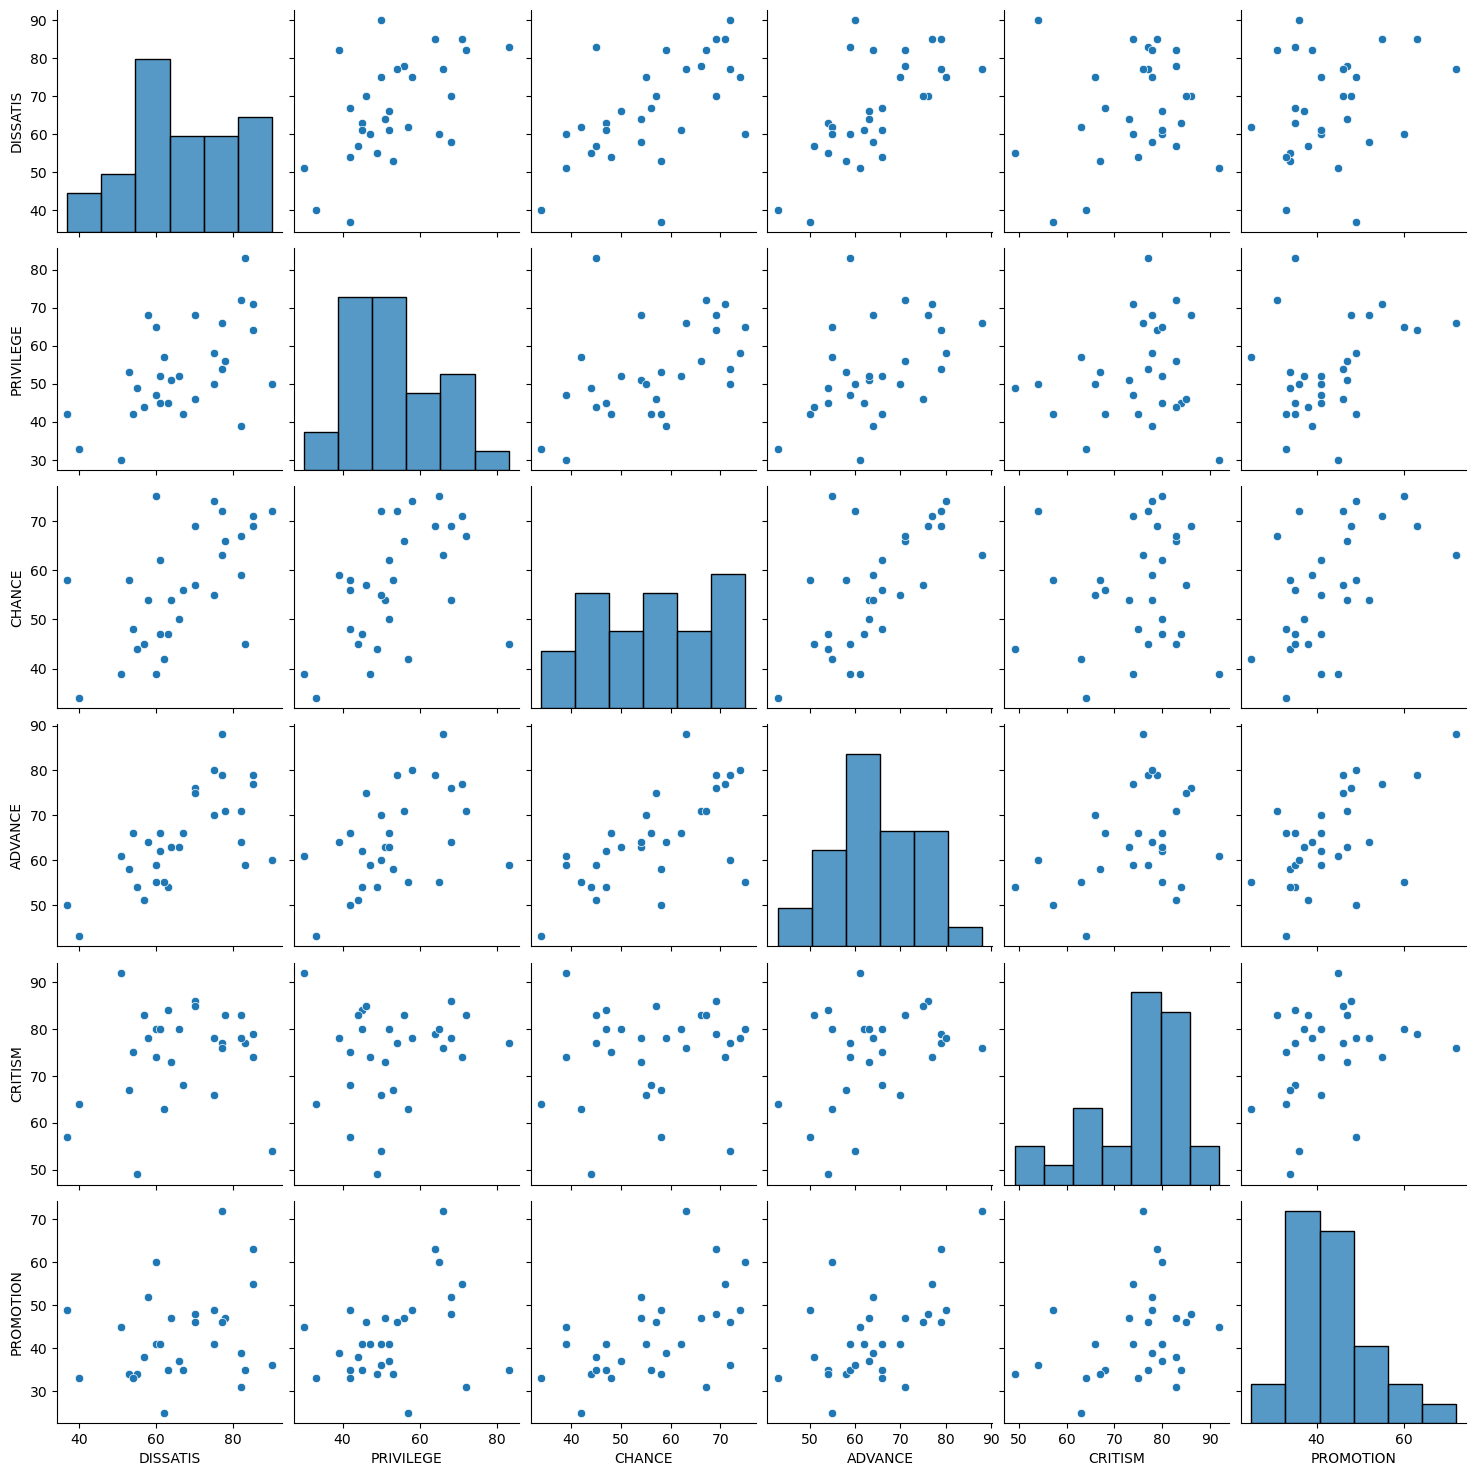

In [4]:
sns.pairplot(df_raw_x)

In [5]:
df_raw_x.corr().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


In [6]:
df_raw_x.describe().round(3)


,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,66.600,53.133,56.367,64.633,74.767,42.933
std,13.315,12.235,11.737,10.397,9.895,10.289
min,37.000,30.000,34.000,43.000,49.000,25.000
25%,58.500,45.000,47.000,58.250,69.250,35.000
50%,65.000,51.500,56.500,63.500,77.500,41.000
75%,77.000,62.500,66.750,71.000,80.000,47.750
max,90.000,83.000,75.000,88.000,92.000,72.000


In [7]:
x_cols=df_raw_x.columns

In [8]:
## Scale변환
scaler=StandardScaler()
nd_scaled=scaler.fit_transform(df_raw_x)

In [10]:
#변화된 데이터 형태 확인 
print(f"scaled data {nd_scaled[:5].round(3)}")
print(f"shape {nd_scaled.shape}")

scaled data [[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
shape (30, 6)


In [11]:
# 데이터 프레임으로 저장 
df_scaled=pd.DataFrame(nd_scaled,columns=x_cols)
df_scaled.head().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,-1.192,-1.923,-1.505,-0.355,1.771,0.204
1,-0.199,-0.177,-0.205,-0.160,-0.182,0.402
2,0.260,1.236,1.095,1.112,1.155,0.501
3,-0.275,-0.676,-0.812,-1.040,0.949,-0.784
4,0.871,0.238,0.835,0.623,0.846,0.402


In [12]:
## 요약 통계량
df_scaled.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.000,0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017
min,-2.261,-1.923,-1.938,-2.116,-2.649,-1.773
25%,-0.619,-0.676,-0.812,-0.624,-0.567,-0.784
50%,-0.122,-0.136,0.012,-0.111,0.281,-0.191
75%,0.794,0.779,0.900,0.623,0.538,0.476
max,1.787,2.483,1.615,2.286,1.771,2.873


In [13]:
## 주성분 분석 
pca=PCA(n_components=6)
nd_pca=pca.fit_transform(df_scaled)

##생성된 주성분 점수 확인
print(f"PCA data {nd_pca[:5]}")

##생성된 주성분 점수 
print(f"shape {nd_pca.shape}")

PCA data [[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]
shape (30, 6)


In [14]:
# 주성분 저장 및 주성분 분석용 데이터와 주성분 점수 결합
df_pca=pd.DataFrame(nd_pca,columns=['prin1','prin2','print3','prin4','prin5','prin6'])
df_scaled_pca=df_scaled.join(df_pca)
df_scaled_pca

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,prin1,prin2,print3,prin4,prin5,prin6
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461
5,-0.886107,-0.343592,-1.071659,-1.040192,-2.648550,-0.883109,2.463594,1.912424,0.788183,0.174332,0.709853,-0.214980
6,0.030555,-0.925481,-0.031774,0.133692,-0.695544,-0.784254,0.755680,0.510980,-0.042249,-1.036323,0.058321,-0.252712
7,0.641664,-0.260465,-0.118431,0.524987,-0.901124,-0.191121,-0.107754,0.818047,0.016631,-0.709458,0.658251,-0.007035
8,1.176384,1.568330,0.921454,0.622811,0.846302,-1.179676,-1.608941,0.679477,-1.814521,0.313533,-0.688569,-0.522567
9,-0.427776,-0.676100,-0.811688,-0.257602,0.537933,-0.191121,0.908086,-0.859195,-0.259094,-0.124773,0.199506,0.076567


In [15]:
## 주성분 분석의 고유값 확인 및 주성분 개수 결정 
df_pca_stat=pd.DataFrame()
df_pca_stat['prinno']=[i for i in range(1,7)]
df_pca_stat['eigenvalue']=pca.explained_variance_
df_pca_stat['eigenvalueratio']=pca.explained_variance_ratio_
df_pca_stat['cumeigenvalueratio']=np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,prinno,eigenvalue,eigenvalueratio,cumeigenvalueratio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


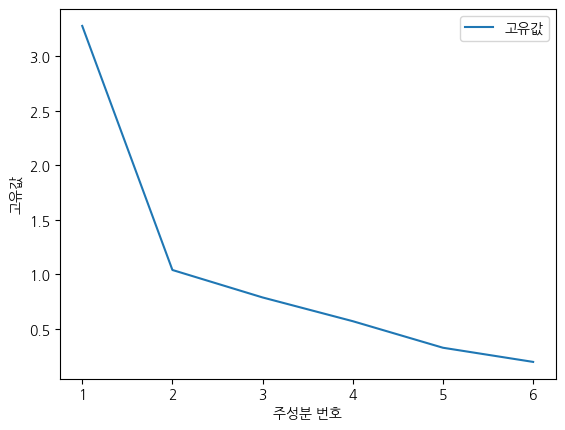

In [18]:
#scree plot 
plt.plot(df_pca_stat['prinno'],df_pca_stat['eigenvalue'],label='고유값')

##그래프 
plt.ylabel("고유값")
plt.xlabel("주성분 번호")
plt.legend(loc='best')